<a href="https://colab.research.google.com/github/odesay97/MachineLearing_Class/blob/main/9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

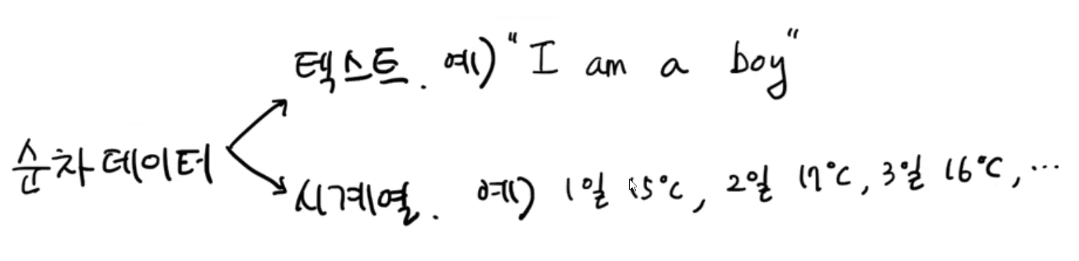

지금까지 사용한 데이터는 순서와 상관이 없고 심지어 골고루 섞는 편이 결과가 더 좋음

순차 데이터는 순서를 유지하는 것이 중요함

따라서 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요

예를 들어 "별로지만 추천해요"에서 "추천해요"가 입력될 때 "별로지만"을 기억하고 있어야 이 댓글이 무조건 긍정적이라고 판단하지 않을 수 있음

------------

완전 연결 신경망이나 합성곱 신경망은 이런 기억 장치가 없음

하나의 샘플을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않음

**피드포워드 신경망(feedforward neural network)**

입력 데이터의 흐름이 앞으로만 전달되는 신경망

완전 연결 신경망과 합성곱 신경망이 포함

**순환 신경망(recurrent neural network)**

신경망이 이전에 처리했던 샘플을 다음 샘플을 처리하는데 재사용하기 위해서는 이전 데이터가 신경망 층에 순환될 필요가 있음

일반적인 완전 연결 신경망과 거의 비슷하나 이전 데이터의 처리 흐름을 순환하는 고리가 하나 추가됨

뉴런의 출력이 다시 자기 자신으로 전달되도록 함

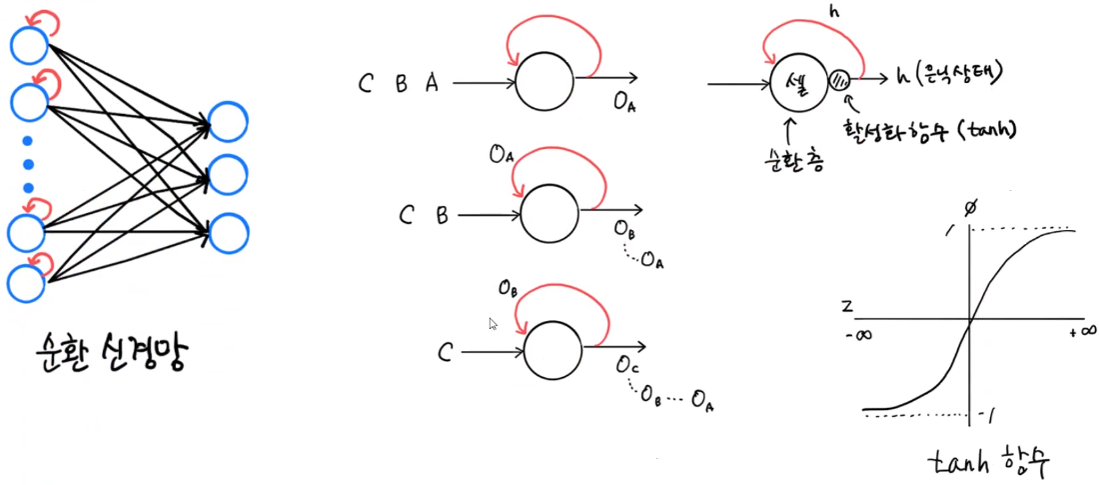

**타임스텝(timestep)**

이전 샘플의 학습 결과도 새 샘플과 같이 입력하여 학습을 수행하는 방법

A를 입력으로 받은 뉴런이 출력 OA를 내보내고 그 뉴런은 이 출력 OA를 다음 입력 B와 함께 처리하여 출력 OB를 내보냄

이 출력 OB에는 A의 정보가 들어가 있음

뉴런은 다음 입력 C와 OB를 입력으로 받아 OC를 출력하며 이를 반복함

OC에는 B와 A의 정보가 들어가 있으나 A의 정보량은 B에 비해 낮을 수밖에 없음

순환 신경망에서는 이 층을 특별히 셀(cell)이라고 부름

한 셀에는 여러개의 뉴런이 있지만 완전 연결신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현함( 모두 표현하기 너무 힘들기 떄문 )

셀의 출력을 은닉 상태(hidden state)라고 부름

합성곱 신경망에서처럼 신경망의 구조마다 조금씩 부르는 이름이 다를 수 있으나 기본 구조는 같음

입력에 어떤 가중치를 곱하고 활성화 함수를 통과시켜 다음 층으로 보냄

달라지는 것은 층의 출력(은닉 상태)을 다음 타임 스텝에 재사용한다는 것임

일반적으로 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트(hyperbolic tangent)함수인 tanh가 많이 사용됨

tanh 함수도 S자 모양을 띠기 떄문에 종종 시그모이드 함수라 부르기도 하지만 tanh함수는 시그모이드 함수가 0부터 1사이의 범위를 가지는 것과는 다르게 -1부터 1사이의 범위를 가짐

다른 신경망과 마찬가지로 순환 신경망 그림에도 활성화 함수를 따로 표시하지 않는 경우가 있으나 반드시 필요함

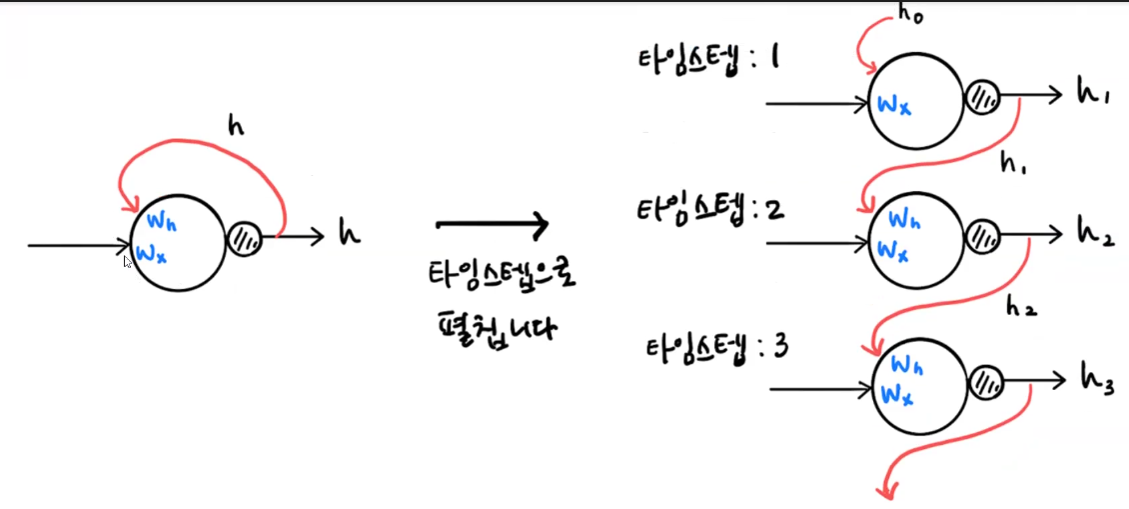

**타임스템의 개수는??**

뉴런에 입력되는 데이터 횟수에 비례하여 증가함


**셀의 가중치**

순환 신경망의 셀에서 필요한 가중치 크기를 계산해보자

복잡한 모델의 가중치 개수를 계산함으로써 모델의 이해 정도를 알 수 있음

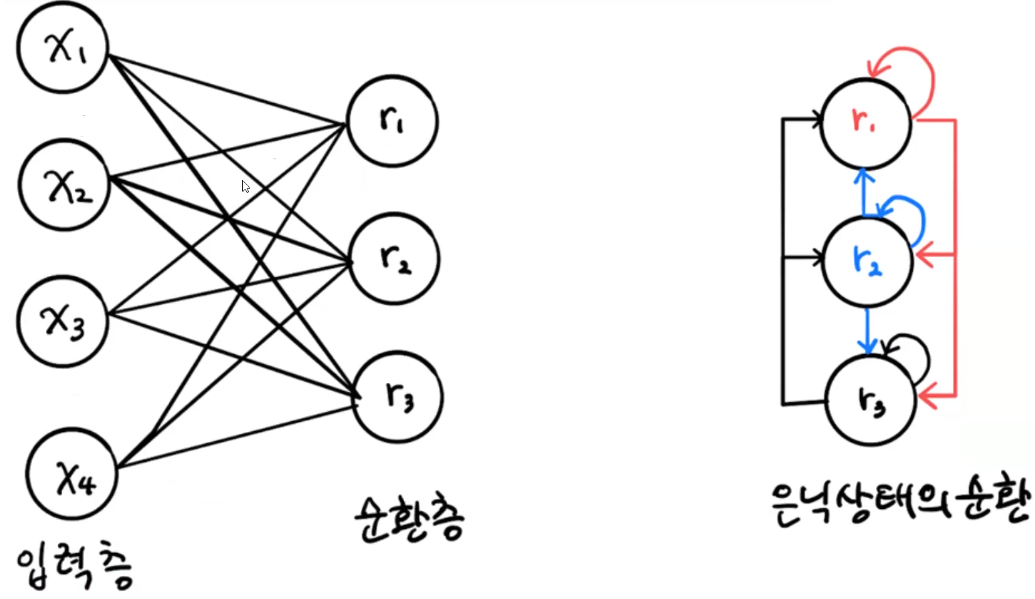

예) 순환층에 입력되는 특성의 개수가 4개이고 순환층의 뉴런이 3개

입력에 곱해지는 가중치(wx)는 입력층과 순환층의 뉴런이 모두 완전 연결되기 때문에 가중치 wx의 크기는 4*3=12

완전 연결 신경망의 입력층과 은닉층의 연결과 같음

----------

순환층에서 다음 타임 스텝에 재사용되는 은닉상태를 위한 가중치(wh)는 약간 복잡함

순환층에 있는 각 뉴런의 은닉 상태는 다음 타임스텝에 재사용될 때 동일한 순환층에 있는 모든 뉴런들에게 모두 전달

즉, 이전 타임스텝의 은닉 상태는 다음 타임스텝의 뉴런에 완전히 연결됨

따라서 이 순환층에서 은닉 상태를 위한 가중치는 3*3=9

---------

모델 파라미터 개수는 가중치에 절편을 더하면 됨

절편은 각 뉴런마다 하나씩 존재하므로 이 순환층은 모두 3개의 절편이 존재

따라서 이 순환층의 12+9+3=24개의 모델 파라미터를 가지고 있음

-----

매우 복잡하여 이를 모두 표현하기 어려우므로 순환층을 하나의 셀로 표시할 수 밖에 없음


**셀의 입출력**

합성곱 층의 입력은 전형적으로 하나의 샘플이 3개의 차원 (너비, 높이, 채널)을 가짐

입력이 합성곱 층과 풀링 층을 통과하면 너비, 높이, 채널의 크기가 달라지지만 차원의 개수는 그대로 유지됨

순환층은 일반적으로 샘플마다 2개의 차원을 가짐

보통 하나의 샘플을 하나의 시퀀스(sequence)라 하고 시퀀스 안에는 여러 개의 아이템이 들어있음

이 시퀀스의 길이가 바로 타임스텝의 길이

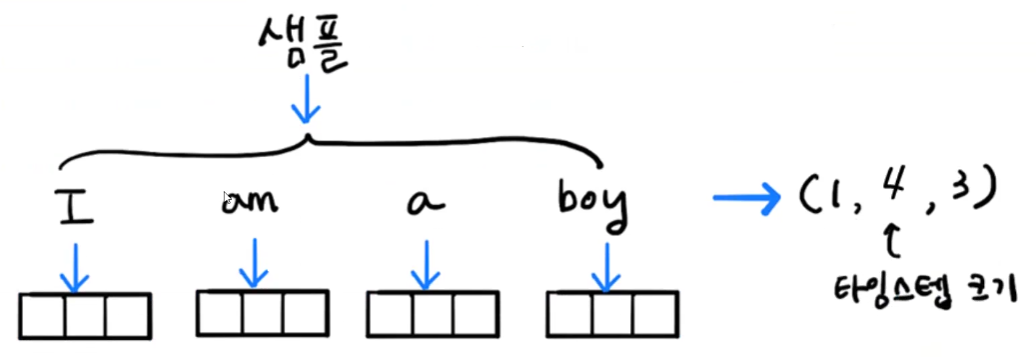

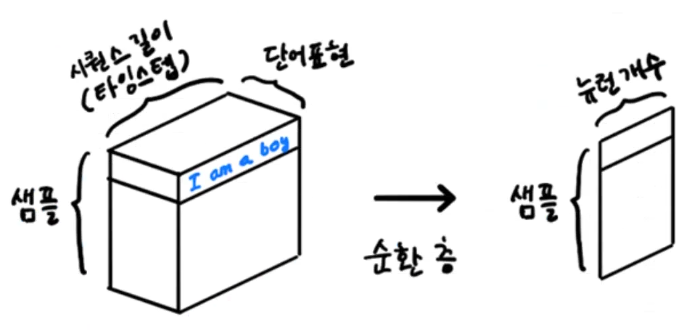

예를 들어 어떤 샘플에 "I am a boy"란 문장이 들어 있다고 가정

이 샘플은 4개의 단어로 이루어져 있음

각 단어를 3개의 어떤 숫자로 표현한다고 가정

이 경우 입력의 크기는 (1,4,3)이고, 타임스텝의 크기는 4

이런 입력은 순환층을 통과하면 두번쨰, 세번쨰 차원이 사라지고 순환층의 뉴런 개수만큼 출력됨

이 예의 하나의 샘플은 시퀀스 길이(단어 개수, 타임스텝의 크기)와 단어 표현 (숫자로 표현된 단어)의 2차원 배열 순환층을 통과하면 1차원 배열로 바뀜

이 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정됨

앞에서는 셀이 모든 타임스텝에서 출력을 만드는 것처럼 표현했지만, 순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보냄

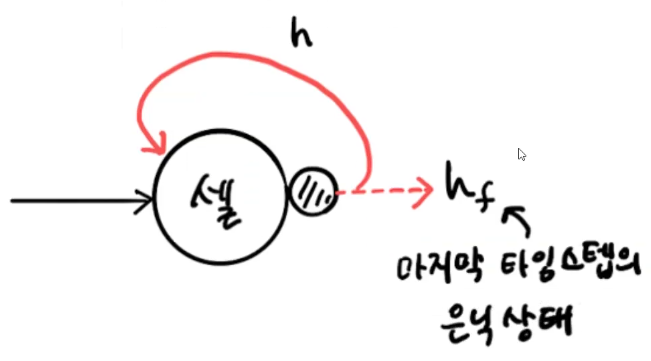

마치 입력된 시퀀스 길이를 모두 읽어서 정보를 마지막 은닉 상태에 압축하고 전달하는 것처럼 볼 수 있음

이것이 바로 순환 신경망이 정보를 기억하는 메모리를 가진다고 표현하고 순차 데이터에 잘 맞는 이유임

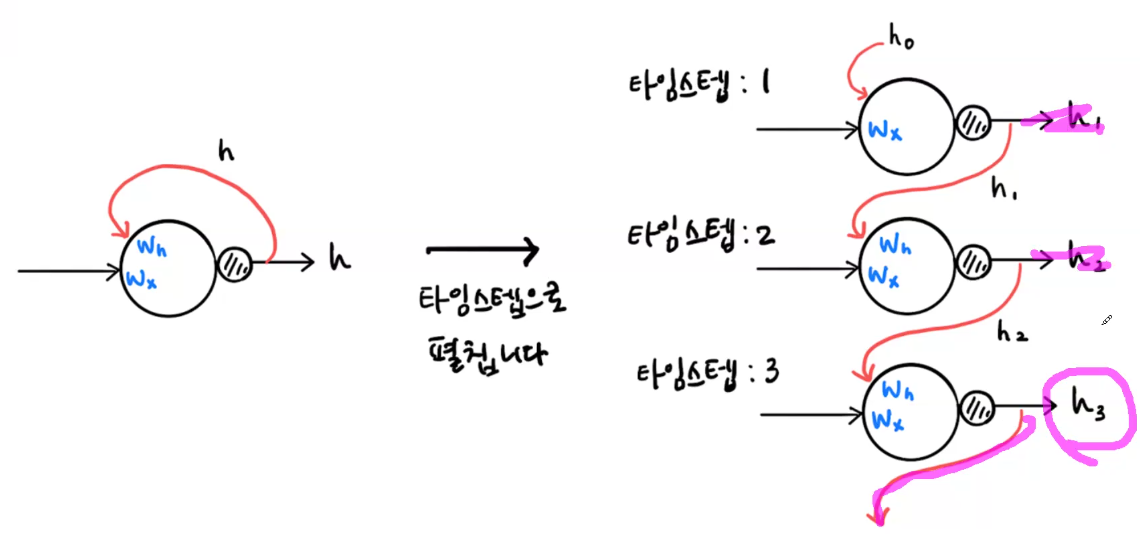

순환 신경망도 완전 연결 신경망이나 합성곱 신경망처럼 여러개의 층을 쌓을 수 있음

셀의 입력은 샘플마다 '타임스텝'과 '단어 표현'으로 이루어진 2차원 배열이어야함

따라서 첫번째 셀이 마지막 타임 스텝의 은닉 상태만 출력해서는 안됨

이 경우 마지막 셀을 제외한 다른 모든 셀은 모든 타임스텝의 은닉 상태를 출력함

2개의 순환층을 쌓은 경우는 아래 그림과 같이 표현가능

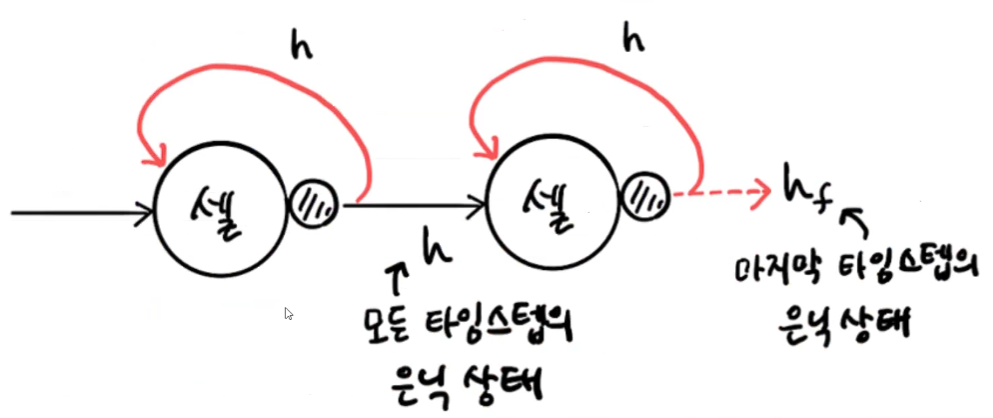

첫번째 셀은 모든 타임스텝의 은닉 상태를 출력

두번쨰 셀은 마지막 타임스텝의 은닉 상태만 출력

**출력층의 구성**

합성곱 신경망과 마찬가지로 순환 신경망도 마지막에는 밀집층을 두어 클래스를 분류함

다중 분류일 경우 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활성화 함수를 사용

이진 분류일 경우 하나의 뉴런을 두고 시그모이드 활성화 함수를 사용

합성곱 신경망과 다른 점은 마지막 셀의 출력이 1차원이기 때문에 Flatten클래스로 펼칠 필요가 없음



**3개의 클래스를 가진 다중 분류 문제에서 입력 샘플의 크기가 (20,100)일 경우 하나의 순환층을 사용하는 순환 신경망의 구조**

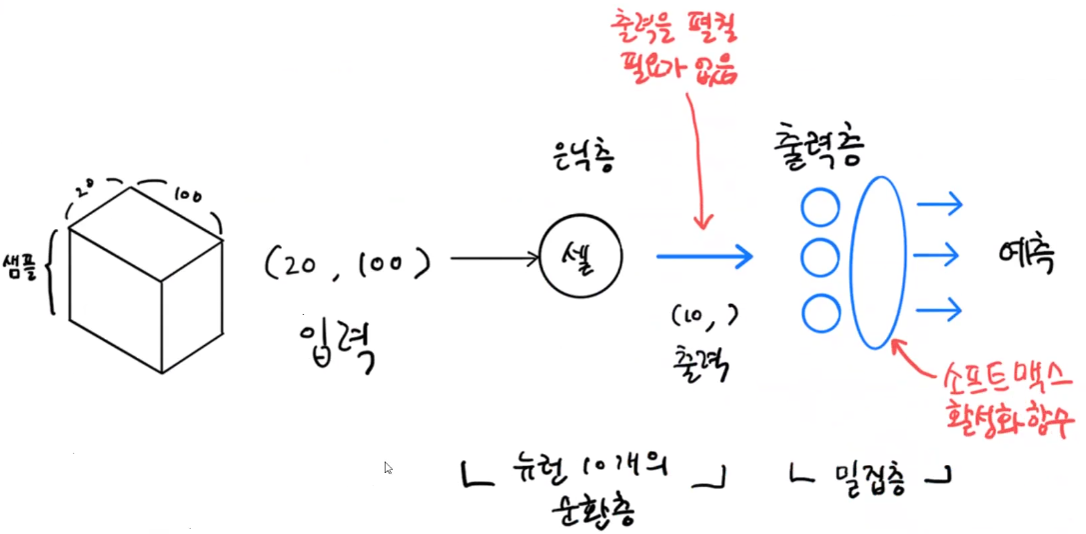

샘플은 20개의 타임스텝으로 이루어져있음

각 타임스텝은 100개의 표현(특성) 으로 이루어짐

이 샘플이 순환층의 셀을 통과하면 모든 타임스텝을 처리하고 난 후의 은닉 상태만 출력

이 은닉 상태의 크기는 셀에 있는 뉴런의 개수가 되므로 (10,)

샘플마다 셀이 1차원 배열을 출력하므로 합성곱 신경망처럼 Flatten 클래스로 펼칠 필요 없이 바로 출력층에 연결 가능

3개의 클래스를 가진 다중 분류 이므로 출력층에 3개의 뉴런과 소프트맥스 활성화 함수를 사용